In [0]:
from google.colab import drive
drive.mount('/content/drive')
import os
import shutil
os.chdir('/content/drive/My Drive/machine learning folder/breast cancer')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Used Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import torch as tch
from torchvision import models#, datasets, transforms
from torch import nn, optim
from collections import OrderedDict
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_curve,roc_auc_score
%matplotlib inline

In [0]:
np.random.seed(42)

# Import DataSets

In [0]:
X_train = pd.read_csv('X_train').drop(['Unnamed: 0'],axis=1)
y_train = pd.read_csv('y_train').drop(['Unnamed: 0'],axis=1).values
X_test = pd.read_csv('X_test').drop(['Unnamed: 0'],axis=1)
y_test = pd.read_csv('y_test').drop(['Unnamed: 0'],axis=1).values
X_val = pd.read_csv('X_val').drop(['Unnamed: 0'],axis=1)
y_val = pd.read_csv('y_val').drop(['Unnamed: 0'],axis=1).values

# Train model with Pytorch

### Convert data to tensor

In [0]:
train_target = tch.tensor(y_train)
train =        tch.tensor(X_train.values.astype(np.float32))

test_target =  tch.tensor(y_test)
test =         tch.tensor(X_test.values.astype(np.float32))

val_target =  tch.tensor(y_val)
val =         tch.tensor(X_val.values.astype(np.float32))

In [0]:
train_target.shape

torch.Size([3492, 1])

### Define the loss and optimizer 

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(_1_hidlay.parameters(), lr=0.01)

In [0]:
batch_size = 30

### Create batches for dataset

In [0]:
train_tensor = tch.utils.data.TensorDataset(train, train_target) 
train_loader = tch.utils.data.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)
       
test_tensor =  tch.utils.data.TensorDataset(test, test_target) 
test_loader =  tch.utils.data.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = True)

### Model Class

In [0]:
CUDA_LAUNCH_BLOCKING=1
tch.cuda.is_available()

True

In [0]:
class train_model:
  
  def __init__(self,model = None,criterion=None,optimizer=None,epochs=10, batch_size = 30,lr=0.01):
    
    self.model = model
    self.criterion = criterion
    self.optimizer = optimizer
    self.batch_size = batch_size
    self.epochs= epochs
    self.weights = None
    self.y_scores_train = []
    self.y_scores_test = []
   # self.valid_loader = te
   # self.train_loader = testset
    #self.batch = batch
    #self.epochs = epochs
    self.train_loss = []
    self.test_loss = []
    self.train_acc = []
    self.test_acc = []
    self.train_rec = []
    self.test_rec = []
    self.train_f1_scr = []
    self.test_f1_scr = []
    self.train_pre = []
    self.test_pre = []
    self.t_epch = 0
    #self.save_on_train = save_on_train
    
  def train(self,train_loader=None, valid_loader=None):
    
    criterion = self.criterion
    optimizer = self.optimizer
    epochs = self.epochs
    batch_size= self.batch_size
    model = self.model
    #CUDA_LAUNCH_BLOCKING=1
    valid_rec_min = 0.0
    train_on_gpu = False #tch.cuda.is_available()
    new_state = model.state_dict()
    self.t_epch += epochs
    for epoch in range(epochs):
      # keep track of training and validation loss and scores
        train_loss    = 0.0
        test_loss    = 0.0
        train_acc     = 0.0
        train_pre     = 0.0
        train_rec     = 0.0
        train_f1_scr  = 0.0
        test_acc      = 0.0
        test_pre      = 0.0
        test_rec      = 0.0
        test_f1_scr   = 0.0
      
      ###################
      # train the model #
      ###################
        model.cpu()
        
        
        for data, target in train_loader:
       
          # move tensors to GPU if CUDA is available

            if train_on_gpu:
                
                #model.cuda()
                model.train()
                data1, target = data.cuda(), target.cuda()
          
            
            else:
                model.cpu()
                model.train()
                data, target = data.cpu(), target.cpu()
     
          # clear the gradients of all optimized variables
            optimizer.zero_grad()
     
          # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
           # print(f'output = {output}, target{target.squeeze()}')
          # calculate the batch loss
            loss = criterion(output, target.squeeze())                   
      
          # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
      
          # perform a single optimization step (parameter update)
            optimizer.step()
       
          # update training loss
            train_loss     +=  loss.item()*data.size(0)
            train_acc      +=  accuracy_score(target.cpu(), output.cpu().topk(1)[1])
            train_pre      +=  precision_score(target.cpu(), output.cpu().topk(1)[1])
            train_rec      +=  recall_score(target.cpu(), output.cpu().topk(1)[1])
            train_f1_scr   +=  f1_score(target.cpu(), output.cpu().topk(1)[1])
  
        
      ######################    
      # validate the model #
      ######################
        model.eval()
     
        for data, target in valid_loader:
      
          # move tensors to GPU if CUDA is available
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()
       
          # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
          
          # calculate the batch loss
            loss = criterion(output, target.squeeze(1))
                    
          # update average validation loss 
            test_loss     += loss.item()*data.size(0)
            test_acc       += accuracy_score(target.cpu(), output.cpu().topk(1)[1])
            test_pre       += precision_score(target.cpu(), output.cpu().topk(1)[1])
            test_rec       +=  recall_score(target.cpu(), output.cpu().topk(1)[1])
            test_f1_scr    +=  f1_score(target.cpu(), output.cpu().topk(1)[1])
            
                
      # calculate average losses and scores
        train_loss = train_loss/round(len(train_loader.dataset)/batch_size)
        test_loss = test_loss/round(len(valid_loader.dataset)/batch_size)
      
        train_acc       =   1 if  train_acc/round(len(train_loader.dataset)/batch_size) > 1 else train_acc/round(len(train_loader.dataset)/batch_size)

        train_pre       =   1 if train_pre/round(len(train_loader.dataset)/batch_size) > 1 else train_pre/round(len(train_loader.dataset)/batch_size)

        train_rec       =   1 if train_rec/round(len(train_loader.dataset)/batch_size) > 1 else train_rec/round(len(train_loader.dataset)/batch_size)
                                     
        train_f1_scr    =   1 if train_f1_scr/round(len(train_loader.dataset)/batch_size) > 1 else train_f1_scr/round(len(train_loader.dataset)/batch_size)

        test_acc        =   1 if test_acc/round(len(valid_loader.dataset)/batch_size) > 1 else test_acc/round(len(valid_loader.dataset)/batch_size)

        test_pre        =   1 if test_pre/round(len(valid_loader.dataset)/batch_size) > 1 else test_pre/round(len(valid_loader.dataset)/batch_size)
  
        test_rec        =   1 if test_rec/round(len(valid_loader.dataset)/batch_size,5) > 1 else test_rec/round(len(valid_loader.dataset)/batch_size,5)

        test_f1_scr    =   1 if test_f1_scr/round(len(valid_loader.dataset)/batch_size,5) > 1 else test_f1_scr/round(len(valid_loader.dataset)/batch_size,5) 

      

            
      #append train scores
        self.train_loss.append(train_loss)
        self.train_acc.append(train_acc)
        self.train_rec.append(train_rec)
        self.train_f1_scr.append(train_f1_scr)
        self.train_pre.append(train_pre)
        
      #append test scores
        self.test_loss.append(test_loss)
        self.test_acc.append(test_acc)
        self.test_rec.append(test_rec)
        self.test_f1_scr.append(test_f1_scr)
        self.test_pre.append(test_pre)
        
      # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} '.format(epoch, train_loss, test_loss))
      
        print('train Accuracy score : {:.6f} \ttrain Precision Score: {:.6f} \ttrain Recall Score: {:.6f}\ttrain f1 Score: {:.6f}'.format(train_acc, train_pre, train_rec, train_f1_scr))
      
        print('test Accuracy score : {:.6f} \ttest Precision Score: {:.6f} \ttest Recall Score: {:.6f}\ttest f1 Score: {:.6f}'.format(test_acc, test_pre, test_rec, test_f1_scr))
    
      # save model if validation loss has decreased
        if test_rec > valid_rec_min:
            print('test recall increased ({:.6f} --> {:.6f}).  Saving model ...\n\n'.format(valid_rec_min,test_rec))
            self.model = model 
            self.weights = model.state_dict()
            valid_rec_min = test_rec
            
  def predict(self,X = None):
    model = self.model
    #model.load_state_dict(self.weights)
    #model.eval()
    model.cpu().eval()
    output = model(X).cpu().topk(1)[1]
    out_scr = model(val).cpu()[:,1].detach().numpy()
    
    return output
  
  
  def score(self,X = None):
    model = self.model
    #model.load_state_dict(self.weights)
    #model.eval()
    model.cpu().eval()
    output = model(X).cpu().topk(1)[1]
    out_scr = model(X).cpu()[:,1].detach().numpy()
    
    return out_scr
    

### Plot functions

In [0]:
def plot1(precision, recalls, threshold,title='plot',filename=None):
  plt.figure(figsize(10,10))
  plt.plot(thresholds, precisions[:-1], "b--", label="Precison")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.title(title)
  plt.legend(loc="center left")
  plt.ylim([0,1])
  plt.figure(figsize=(40,10))
  plt.savefig(img_fold+filename)
  
  
  
def plot2(precisions, recalls,title='plot',xlab='recall', ylab='precison',filename=None):
    plt.figure(figsize=(10,10))
    cuv = np.linspace(0,1,500)
    sns.lineplot(recalls, precisions)
    sns.lineplot(cuv,cuv)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title)
    plt.axis([0, 1, 0, 1])
    plt.savefig(img_fold+filename)
    

def plot3(hidd1=None,hidd2=None,hidd3=None,title='plot',filename=None):
  plt.plot(hidd1,label='hidden1')
  plt.plot(hidd2,label='hidden2')
  plt.plot(hidd3,label='hidden3')
  plt.title(title)
  plt.legend()
  plt.savefig(img_fold+filename)
  
def plot4(one=None, two=None, rang = None, lab1=None, lab2=None,ylab=None, xlab=None, title1=None,filename=None):
  plt.figure(figsize=(10,10))
  sns.lineplot(rang,one,legend='full')
  sns.lineplot(rang,two,legend='full')
  plt.xlabel(ylab)
  plt.ylabel(xlab)
  plt.legend((lab2,lab1))
  plt.title(title1)
  plt.savefig(img_fold+filename)
  
def plot5(one=None, two=None, rang = None, lab1=None, lab2=None, title1=None,filename=None):  
  #plt.figure(figsize=(8,8))
  plt.subplot(1,2,2)
  plt.plot(rang, one, label=lab1)
  plt.plot(rang, two, label=lab2)
  plt.legend(loc='upper right')
  plt.title(title1)
  plt.savefig(img_fold+filename)
  
def plot(precisions, recalls,title='plot',xlab='recall', ylab='precison',filename=None):
    plt.figure(figsize=(10,10))
    cuv = np.linspace(0,1,500)
    sns.lineplot(recalls[0], precisions[0])
    sns.lineplot(recalls[1], precisions[1])
    sns.lineplot(recalls[2], precisions[2])
    sns.lineplot(cuv,cuv)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title)
    plt.axis([0, 1, 0, 1])
    plt.savefig(img_fold+filename)

In [0]:
img_fold = '/content/drive/My Drive/machine learning folder/breast cancer/images/'

### Train model one

##### Create model architecture

In [0]:
_1_hidlay = nn.Sequential(OrderedDict([ 
                                    ("input",       nn.Linear(23, 10)),
                                    ("activ",       nn.ReLU()),
                                    ("Drop1",       nn.Dropout(0.2)),
                                    ("hidden1",     nn.Linear(10, 2)),
                                    ("sig_out",     nn.Sigmoid())
                                ]))

In [298]:
_1_hidtrain = train_model(model = _1_hidlay,criterion=criterion,optimizer=optimizer1,epochs=10)
_1_hidtrain.train(train_loader=train_loader,valid_loader=test_loader)

Epoch: 0 	Training Loss: 19.637332 	Validation Loss: 21.277228 
train Accuracy score : 0.798132 	train Precision Score: 0.927868 	train Recall Score: 0.855011	train f1 Score: 0.888239
test Accuracy score : 0.760544 	test Precision Score: 0.928337 	test Recall Score: 0.809982	test f1 Score: 0.867555
test recall increased (0.000000 --> 0.809982).  Saving model ...


Epoch: 1 	Training Loss: 19.701850 	Validation Loss: 21.277227 
train Accuracy score : 0.798276 	train Precision Score: 0.929115 	train Recall Score: 0.854700	train f1 Score: 0.888212
test Accuracy score : 0.759184 	test Precision Score: 0.927646 	test Recall Score: 0.809817	test f1 Score: 0.867198
Epoch: 2 	Training Loss: 19.662293 	Validation Loss: 21.277227 
train Accuracy score : 0.794684 	train Precision Score: 0.928228 	train Recall Score: 0.849795	train f1 Score: 0.885434
test Accuracy score : 0.759184 	test Precision Score: 0.928570 	test Recall Score: 0.810435	test f1 Score: 0.867492
test recall increased (0.809982 -

#### MSE_loss

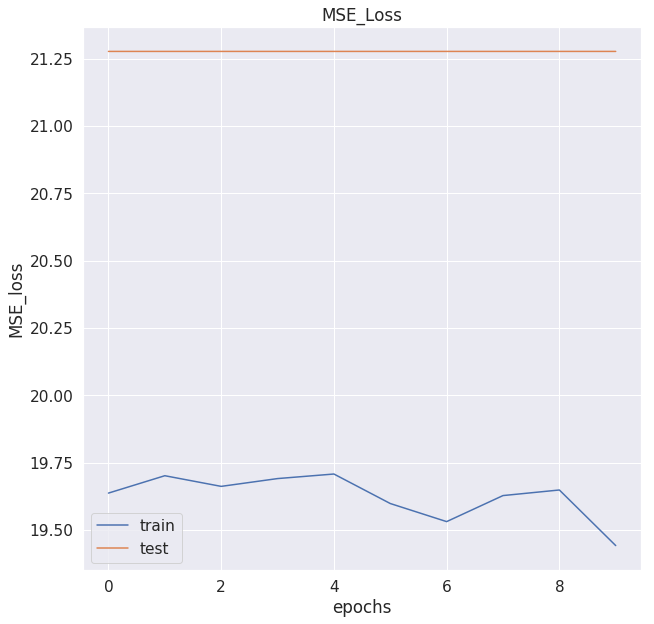

In [332]:
epochs_rang = range(10)
MSE_trainloss = _1_hidtrain.train_loss
MSE_testloss  = _1_hidtrain.test_loss

plot4(MSE_trainloss, MSE_testloss, epochs_rang, 'test','train','epochs','MSE_loss','MSE_Loss','model1_MSE_LOSS')

#### Convergence rate

In [333]:
_1_hidtrain.predict(train)

tensor([[0],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]])

In [0]:
#_1_hidtrain.test_acc

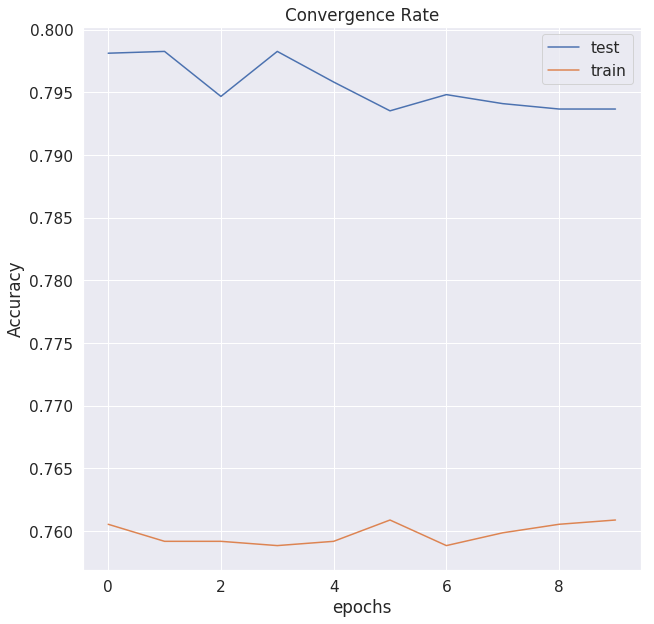

In [335]:
#epochs_rang = range(500)
acc_train = _1_hidtrain.train_acc
acc_test  = _1_hidtrain.test_acc

plot4(acc_train, acc_test, epochs_rang, 'train', 'test','epochs','Accuracy','Convergence Rate','model1_COVERGENCE_RATE')

#### F1 score graph

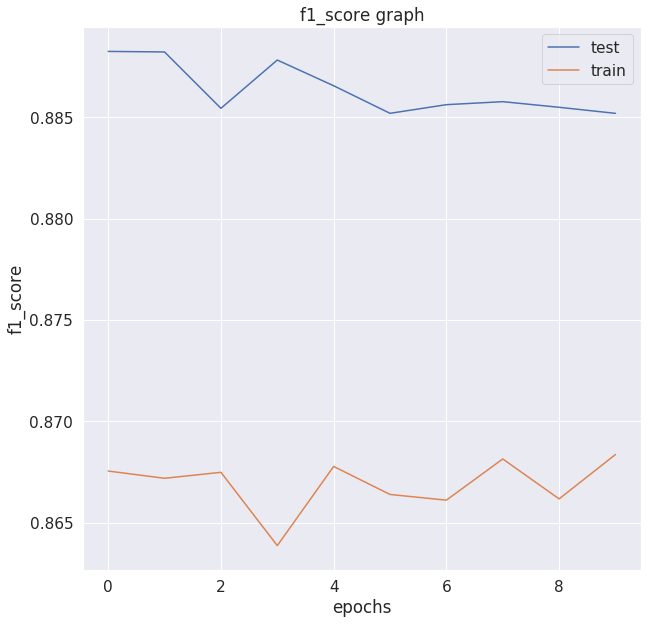

In [336]:
#epochs_rang = range(500)
f1_train = _1_hidtrain.train_f1_scr
f1_test  = _1_hidtrain.test_f1_scr

plot4(f1_train, f1_test, epochs_rang, 'train', 'test','epochs','f1_score','f1_score graph','model1_F1_SCORE_GRAPH')

#### ROC Curve

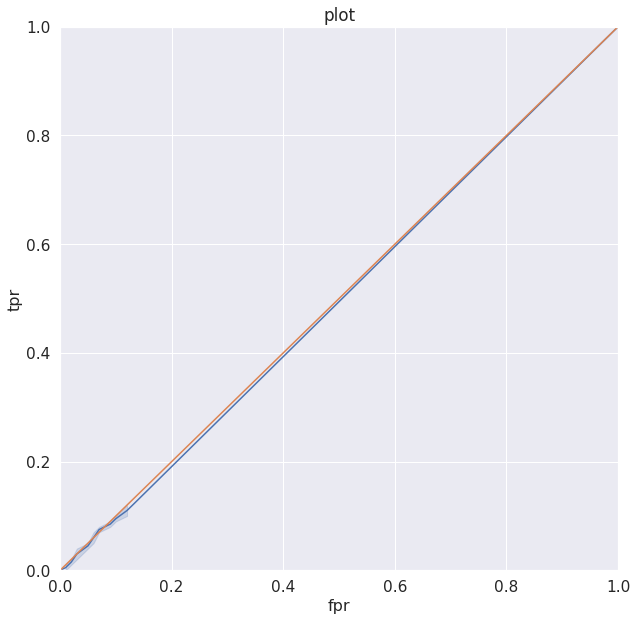

In [337]:
_1_hidtrain.model.cpu().eval()
output = _1_hidtrain.model(val).cpu().topk(1)[1]
out_scr = _1_hidtrain.model(val).cpu()[:,1].detach().numpy()

tpr, fpr, thres = roc_curve(val_target,out_scr)

plot2(fpr,tpr,xlab='fpr', ylab='tpr',filename='model1_ROC_CURVE')

In [338]:
roc_auc_score(val_target,out_scr)

0.49520000000000003

#### Confusion matrix

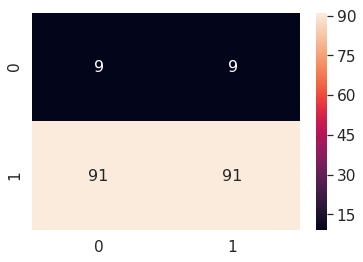

In [339]:
c_m = confusion_matrix(output, val_target)

sns.set(font_scale=1.4)#for label size
sns.heatmap(c_m, annot=True,annot_kws={"size": 16})
plt.savefig(img_fold+'model1_CONFUSION_METRIC')


#### Accuracy score on validation

In [340]:
acc_scor = accuracy_score(output, val_target)
acc_scor

0.5

#### recall

In [341]:
recall = recall_score(output,val_target)
recall

0.5

#### f1_score

In [342]:
f1_scr = f1_score(output,val_target)
f1_scr

0.6453900709219857

In [0]:
#CUDA_LAUNCH_BLOCKING=1

### Train model 2

##### create model

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [368]:
log_reg.fit(X_train,y_train)
predict = log_reg.predict(X_val)

print(f1_score(predict,y_val))

0.6666666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Confusion matrix

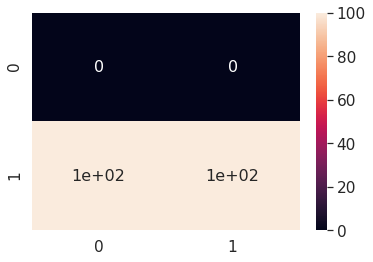

In [369]:
c_m = confusion_matrix(predict, y_val)

sns.set(font_scale=1.4)#for label size
sns.heatmap(c_m, annot=True,annot_kws={"size": 16})
plt.savefig(img_fold+'model2_CONFUSION_METRIC')


#### Accuracy score on validation

In [370]:
acc_scor = accuracy_score(predict, y_val)
acc_scor

0.5

### F1-score

In [371]:
f1_scr = f1_score(predict, y_val)
f1_scr

0.6666666666666666

### Train model 3

In [0]:
from sklearn.tree import DecisionTreeClassifier

dec_tr = DecisionTreeClassifier()
dec_tr.fit(X_train,y_train)
predict = dec_tr.predict(X_val)

#### Confusion matrix

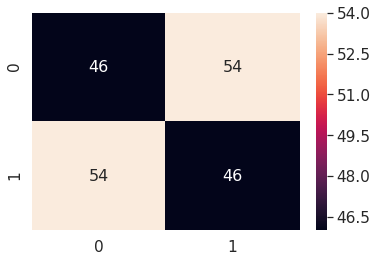

In [364]:
c_m = confusion_matrix(predict, y_val)

sns.set(font_scale=1.4)#for label size
sns.heatmap(c_m, annot=True,annot_kws={"size": 16})
plt.savefig(img_fold+'model3_CONFUSION_METRIC')

#### Accuracy score on validation

In [365]:
acc_scor = accuracy_score(predict, y_val)
acc_scor

0.46

### F1_score

In [366]:
f1_scr = f1_score(predict, y_val)
f1_scr

0.46

# Conclusion ----> During Processing It was Noticed that the data were not Properly Arranged and Code to rearrange it was written in the Data_processing notebook, While in this current notebook(model training notebook) , it was discovered that the data had not linear, corrolation, so the neural network did a good Job during trainng and prediction